In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./bank-additional/bank-additional-full.csv',sep=';')

In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [7]:
df['y'] = df['y'].map({'no':0,'yes':1})

In [8]:
df.y.unique()

array([0, 1], dtype=int64)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000E0F7460E48>,
      dtype=object)

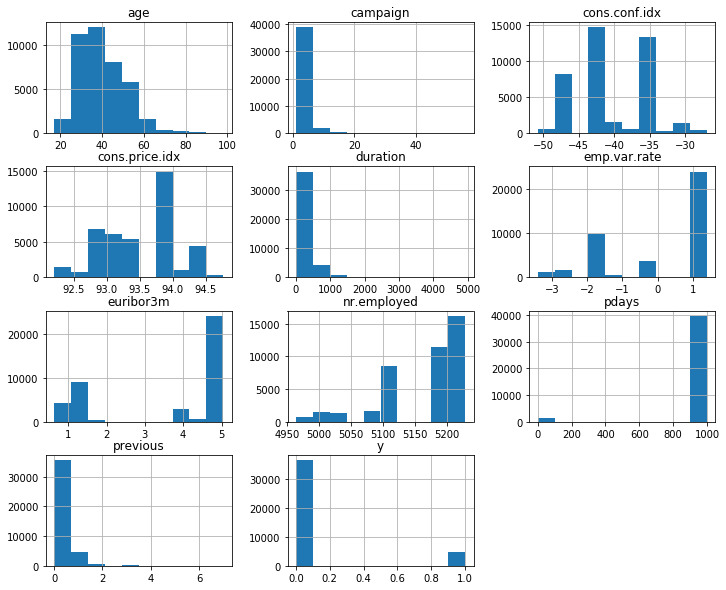

In [9]:
df.hist(figsize=(12,10))

In [10]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [11]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000E0FCFFCEF0>,
      dtype=object)

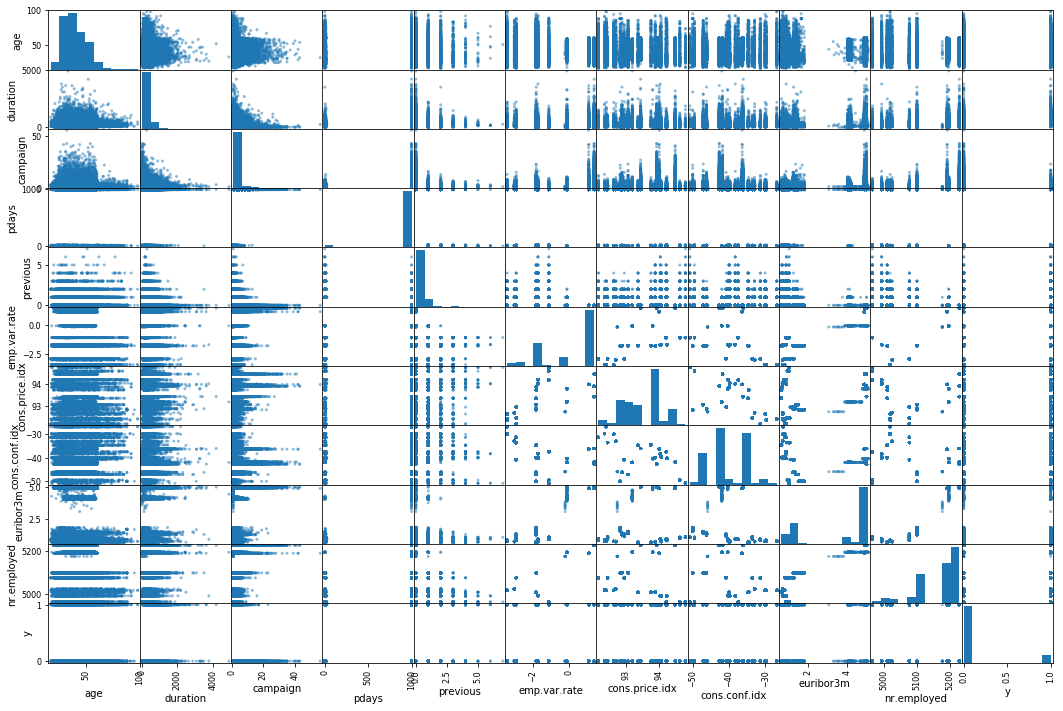

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(18,12))

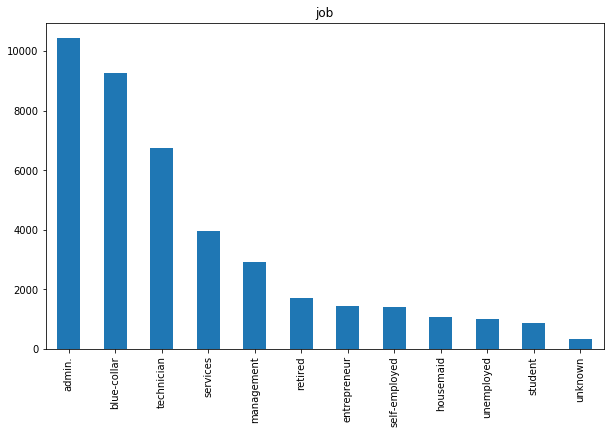

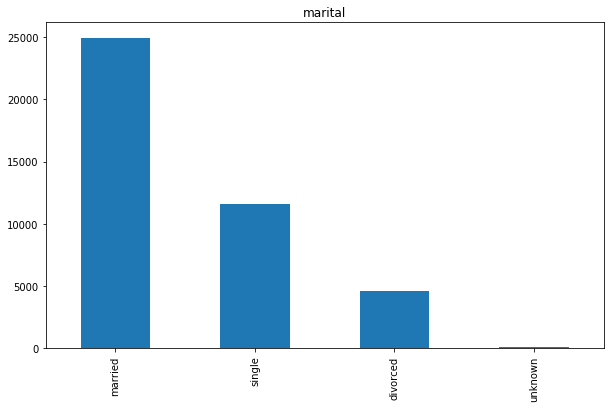

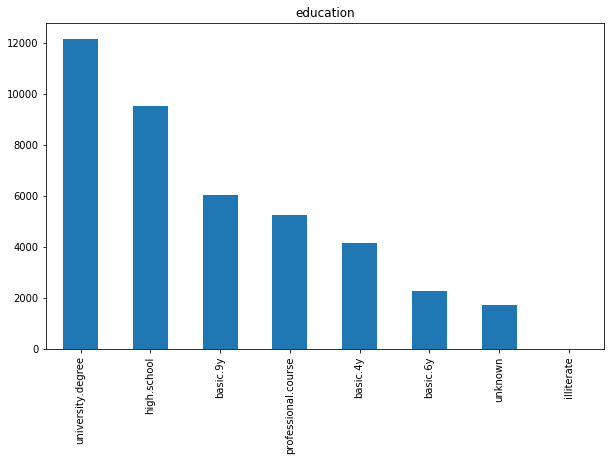

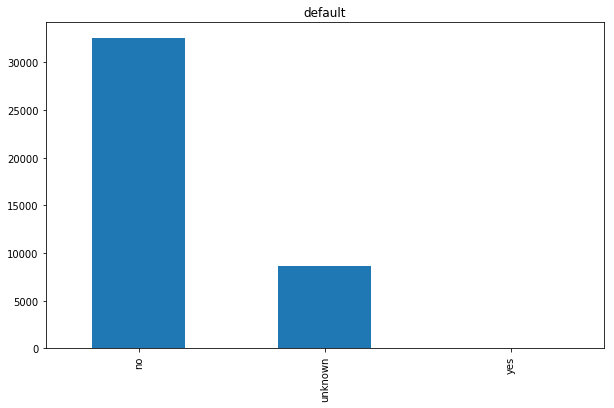

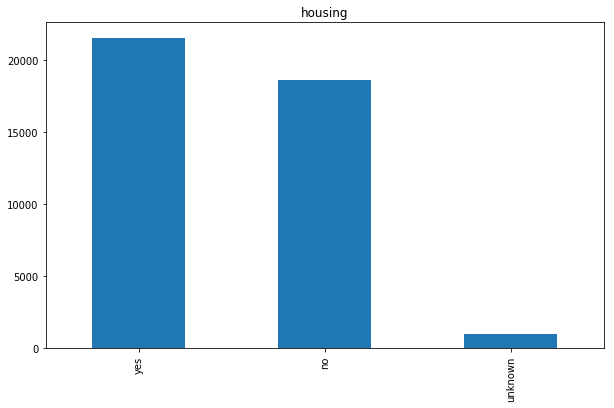

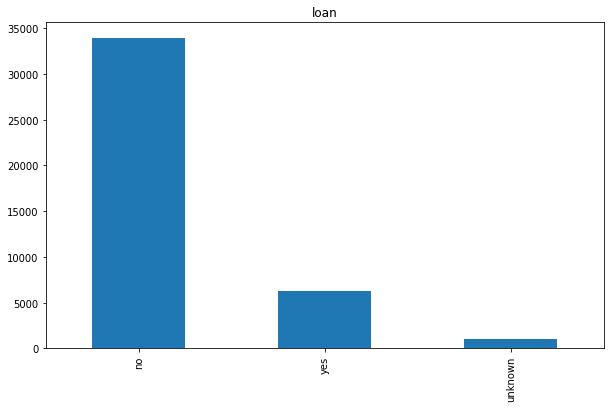

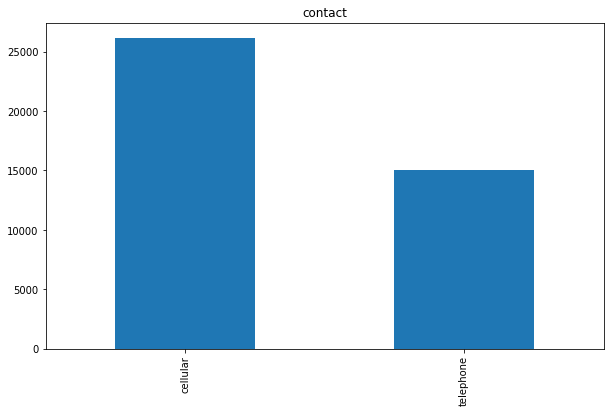

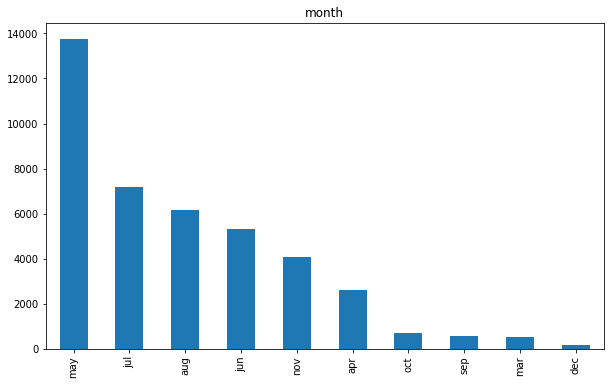

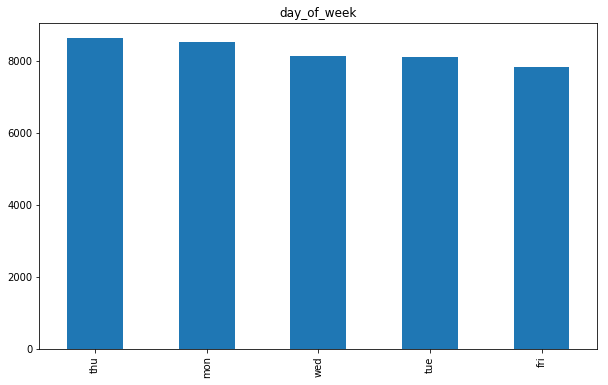

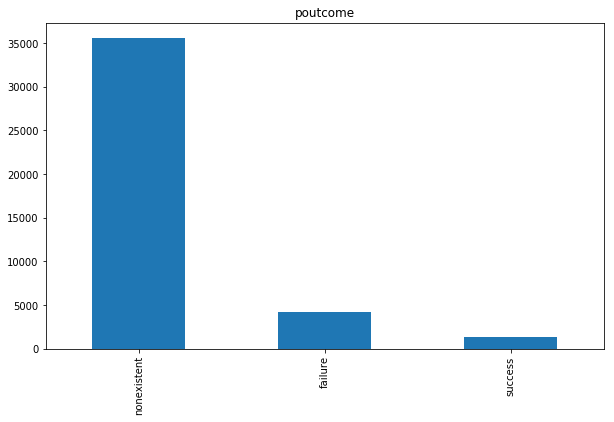

In [13]:
categorical = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for i in categorical:
    df[i].value_counts().plot(kind='bar',figsize = (10,6),title=i)
    plt.show()

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
             'euribor3m', 'nr.employed']
df[numerical] = scaler.fit_transform(df[numerical])

C:\Users\rakesh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [15]:
df_new = pd.get_dummies(df)
df_new = df_new.drop('duration',axis=1)

In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
age                              41188 non-null float64
campaign                         41188 non-null float64
pdays                            41188 non-null float64
previous                         41188 non-null float64
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
y                                41188 non-null int64
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired                      41188 non-null uint8
job_self-

In [17]:
import random
random.seed(3434200)

import sklearn
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=10,test_size =0.2,random_state = 18)
for train_index,test_index in split.split(df_new,df_new['y']):
    train_set = df_new.loc[train_index]
    test_set = df_new.loc[test_index]

In [19]:
from sklearn.utils import resample

train_negative = train_set[train_set['y'] == 0]
train_positive = train_set[train_set['y'] == 1]

train_postitive_upsample = resample(train_positive,
                                   replace = True,
                                   n_samples = 29238,
                                   random_state=18)
train_up_sample = pd.concat([train_negative,train_postitive_upsample])
train_up_sample['y'].value_counts()

1    29238
0    29238
Name: y, dtype: int64

In [20]:
train_negative_undersample = resample(train_negative,
                                   replace = True,
                                   n_samples = 3712,
                                   random_state=18)
train_under_sample = pd.concat([train_positive,train_negative_undersample])
train_under_sample['y'].value_counts()

1    3712
0    3712
Name: y, dtype: int64

In [21]:
x_train_under = train_under_sample.drop('y',axis=1)
y_train_under = train_under_sample['y']

In [22]:
x_imb = train_set.drop('y',axis=1)
y_imb = train_set['y']

In [33]:
x_test = test_set.drop('y',axis=1)
y_test = test_set['y']

In [23]:
def fit_model(model,X,y,parameters=None,scorer_metrics=None):
    grid_obj = GridSearchCV(estimator=model,param_grid = parameters,scoring = make_scorer(scorer_metrics),cv=10)
    grid_fit = grid_obj.fit(X,y)
    model_estimator = grid_fit.best_estimator_
    model_estimator.fit(X,y)
    y_pred = model_estimator.predict(X)
    
    print("\n")
    print("\n model performance on training set\n")
    print("final accuracy score on training data: {:.4f}".format(accuracy_score(y,y_pred)))
    print("final precision score on training data: {:.4f}".format(precision_score(y,y_pred)))
    print("final recall score on training data: {:.4f}".format(recall_score(y,y_pred)))
    print("final auc score on training data: {:.4f}".format(roc_auc_score(y,y_pred)))
    print("\n")
    print("The best parameters are: {}".format(model_estimator))

    return model_estimator    

In [24]:
# create function to use fitted model to report metrics score on test dataset
# return predicted classification on test dataset
def classifier_test(model_fit, X, y):
    y_pred = model_fit.predict(X)
    print("\n")
    print("\nModel performance on test set\n------------------------")
    print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y, y_pred)))
    print("Final precision score on testing data: {:.4f}".format(precision_score(y, y_pred)))
    print("Final Recall score on testing data: {:.4f}".format(recall_score(y, y_pred)))
    print("Final ROC AUC score on testing data: {:.4f}".format(roc_auc_score(y, y_pred)))
    return y_pred

In [25]:
from sklearn.metrics import roc_curve

def roc_curve_plot(model,X,y,label=None):
    if label == "Neural Network":
        y_score = model.predict_proba(X)[:,0]
    else:
        y_score = model.predict_proba(X)[:,1]
    
    roc = roc_curve(y,y_score)
    plt.plot(roc[0],roc[1],label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    
    roc_score = auc(roc[0],roc[1])
    print('auc score of %s is %.4f.' % (label,roc_score))
    

In [26]:
def lift_input(model,X,y,model_name=None):
    if model_name == 'Neural Network':
        proba_pos = model.predict_proba(X)[:,0]
    else:
        proba_pos = model.predict_proba(X)[:,1]
        
    actual_pos = np.array(list(y))
    
    joint = np.concatenate([proba_pos.reshape(proba_pos.shape[0],1),actual_pos.reshape(actual_pos.shape[0],1)],axis=1)
    
    joint_sort = np.sort(joint.view('i8,i8'),order = ['f0'],axis=0).view(np.float)
    
    total_num = len(joint_sort)
    
    total_positive = sum(joint_sort[:,1]==1)
    
    positive_reverse = joint_sort[:,1][::-1]
    
    pred_proba_descending = joint_sort[:,0][::-1]
    
    positive_cumulative = 0
    positive_cumulative_list = [0]
    
    for i in range(len(joint_sort)):
        positive_cumulative = positive_cumulative + positive_reverse[i]/total_positive
        positive_cumulative_list.append(positive_cumulative)
        
    population_cumulative = 0
    population_cumulative_list = [0]
    for i in range(len(joint_sort)):
        population_cumulative = population_cumulative + i/total_num
        population_cumulative_list.append(i/total_num)
        
    return positive_cumulative_list, population_cumulative_list, pred_proba_descending

In [27]:
from sklearn.metrics import auc

def gain_plot(lift_input,label=None):
    plt.plot(lift_input[1],lift_input[0],label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.plot([0,1,0,1])
    plt.xlabel('Population%')
    plt.ylabel('Subscribe%')
    AUC = auc(lift_input[1],lift_input[0],reorder=False)
    print('AUC score of %s is %.4f.' % (label, AUC))

In [28]:
def lift_chart(lift_input,label=None):
    lift_gain_list = []
    n = 0
    for i in range(0,len(lift_input[0])):
        if lift_input[1][i] == 0:
            n+=1
            continue
        else:
            lift_gain_list.append(lift_input[0][i]/lift_input[1][i])
    plt.plot(lift_input[1][0:(len(lift_input[1])-n)], lift_gain_list, label=label)
    plt.plot([0,1],[1,1], 'k--') # reference line with no lift gain at all (=1)
    plt.axis([0,1,0,10])
    plt.xlabel('Population%')
    plt.ylabel('Lift Gain')
    return lift_gain_list
            

In [29]:
def y_predict_threshold(model, X, y, top_percent, model_name=None):
    lift_input_model = lift_input(model, X, y, model_name=model_name)
    # get the indice of probility threshold meeting top_percent number
    idx = int(len(lift_input_model[2])*top_percent)
    # get the probility threshold for classification cutoff
    threshold_proba = lift_input_model[2][idx]
    
    # list of predicted probability
    if model_name == 'Neural Network':
        y_proba = model.predict_proba(X)[:,0]
    else:
        y_proba = model.predict_proba(X)[:,1]
        
    # 0,1 classification using threshold cutff
    y_predict = (y_proba>=threshold_proba).astype(int)
    return y_predict

In [30]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

parameters_LR_under = {'C': [0.0006,0.0007, 0.0008], 'penalty': ['l1', 'l2']}

model_LR_under = fit_model(LogisticRegression(random_state=18), x_train_under, y_train_under, 
                          parameters=parameters_LR_under, scorer_metrics=recall_score)



y_test_LR_under = classifier_test(model_LR_under, x_test, y_test)

joblib.dump(model_LR_under, './Logistic_Regression_model_under.pkl')

C:\Users\rakesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rakesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rakesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rakesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rakesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile




 model performance on training set

final accuracy score on training data: 0.7266
final precision score on training data: 0.7506
final recall score on training data: 0.6786
final auc score on training data: 0.7266


The best parameters are: LogisticRegression(C=0.0008, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=18,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)



Model performance on test set
------------------------
Final accuracy score on the testing data: 0.7610
Final precision score on testing data: 0.2750
Final Recall score on testing data: 0.6853
Final ROC AUC score on testing data: 0.7280


C:\Users\rakesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rakesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


['./Logistic_Regression_model_under.pkl']

auc score of Logistic Regression under sampled is 0.7811.


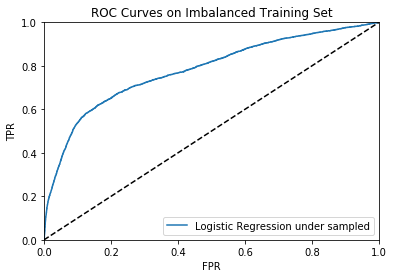

In [36]:
roc_curve_plot(model_LR_under, x_imb, y_imb, label='Logistic Regression under sampled')
plt.title('ROC Curves on Imbalanced Training Set')
plt.legend(loc='lower right')

auc score of Logistic Regression undersampled is 0.7760.


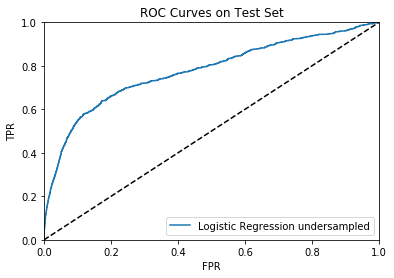

In [37]:
roc_curve_plot(model_LR_under, x_test, y_test, label='Logistic Regression undersampled')
plt.title('ROC Curves on Test Set')
plt.legend(loc='lower right')

AUC score of Logistic Regression undersampled is 0.7495.


C:\Users\rakesh\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)


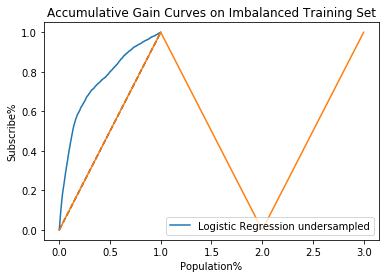

In [38]:
lift_LR_under_imb = lift_input(model_LR_under, x_imb, y_imb)
gain_plot(lift_LR_under_imb, label='Logistic Regression undersampled')
plt.title('Accumulative Gain Curves on Imbalanced Training Set')
plt.legend(loc='lower right')

AUC score of Logistic Regression undersampled is 0.7449.


C:\Users\rakesh\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)


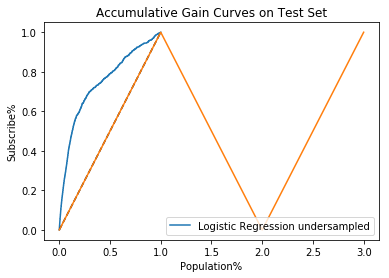

In [39]:
lift_LR_under = lift_input(model_LR_under, x_test, y_test)
gain_plot(lift_LR_under, label='Logistic Regression undersampled')
plt.title('Accumulative Gain Curves on Test Set')
plt.legend(loc='lower right')

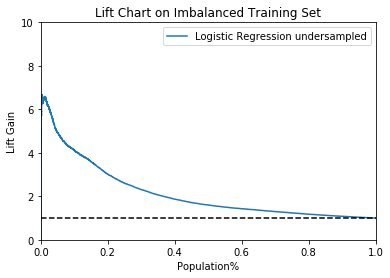

In [40]:
lift_chart_LR_under_imb = lift_chart(lift_LR_under_imb, label='Logistic Regression undersampled')
plt.title('Lift Chart on Imbalanced Training Set')
plt.legend(loc='upper right')

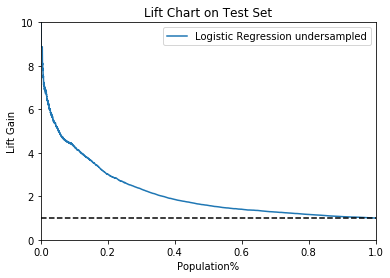

In [41]:
lift_chart_LR_under = lift_chart(lift_LR_under, label='Logistic Regression undersampled')
plt.title('Lift Chart on Test Set')
plt.legend(loc='upper right')

In [44]:
parameters_LR_impv = {'C': [0.0003,0.0004, 0.0005,0.0006,0.0007, 0.0008], 'penalty': ['l1', 'l2'],
                                             'class_weight': [None,'balanced']}

In [45]:
model_LR_impv = fit_model(LogisticRegression(random_state=18), x_train_under, y_train_under, 
                          parameters=parameters_LR_impv, scorer_metrics=recall_score)

C:\Users\rakesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rakesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rakesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rakesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rakesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile




 model performance on training set

final accuracy score on training data: 0.7266
final precision score on training data: 0.7506
final recall score on training data: 0.6786
final auc score on training data: 0.7266


The best parameters are: LogisticRegression(C=0.0008, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=18,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


C:\Users\rakesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [46]:
y_test_LR_impv = classifier_test(model_LR_impv, x_test, y_test)




Model performance on test set
------------------------
Final accuracy score on the testing data: 0.7610
Final precision score on testing data: 0.2750
Final Recall score on testing data: 0.6853
Final ROC AUC score on testing data: 0.7280


In [47]:
joblib.dump(model_LR_impv, './LR_Impv.pkl')

['./LR_Impv.pkl']

AUC score of LR improvised is 0.7495.


C:\Users\rakesh\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)


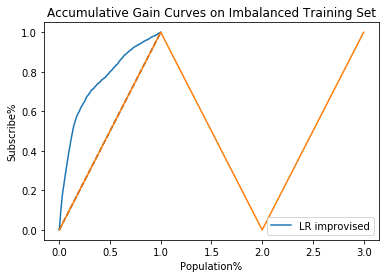

In [48]:
lift_LR_impv_imb = lift_input(model_LR_impv, x_imb, y_imb)
gain_plot(lift_LR_impv_imb, label='LR improvised')
plt.title('Accumulative Gain Curves on Imbalanced Training Set')
plt.legend(loc='lower right')

AUC score of LR improvised is 0.7449.


C:\Users\rakesh\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)


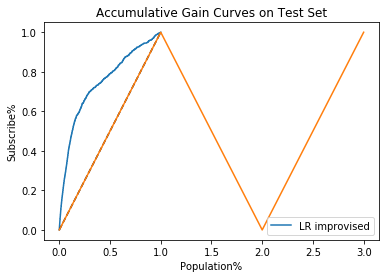

In [49]:
lift_LR_impv = lift_input(model_LR_impv, x_test, y_test)
gain_plot(lift_LR_impv, label='LR improvised')
plt.title('Accumulative Gain Curves on Test Set')
plt.legend(loc='lower right')

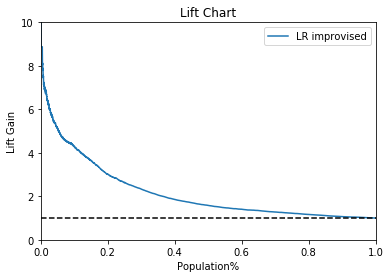

In [50]:
lift_chart_LR_impv = lift_chart(lift_LR_impv, label='LR improvised')
plt.title('Lift Chart')
plt.legend(loc='upper right')

auc score of LR improvised is 0.7811.


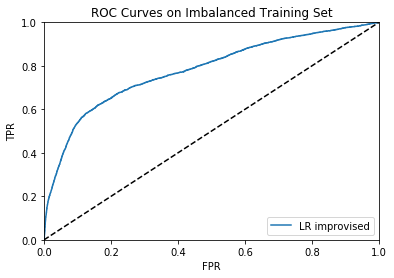

In [51]:
roc_curve_plot(model_LR_impv, x_imb, y_imb, label='LR improvised')
plt.title('ROC Curves on Imbalanced Training Set')
plt.legend(loc='lower right')

auc score of LR improvised is 0.7760.


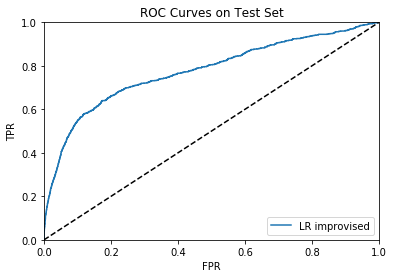

In [52]:
roc_curve_plot(model_LR_impv, x_test, y_test, label='LR improvised')
plt.title('ROC Curves on Test Set')
plt.legend(loc='lower right')


Confusion matrix

Example of confusion matrix usage to evaluate the quality
of the output of a classifier on the iris data set. The
diagonal elements represent the number of points for which
the predicted label is equal to the true label, while
off-diagonal elements are those that are mislabeled by the
classifier. The higher the diagonal values of the confusion
matrix the better, indicating many correct predictions.

The figures show the confusion matrix with and without
normalization by class support size (number of elements
in each class). This kind of normalization can be
interesting in case of class imbalance to have a more
visual interpretation of which class is being misclassified.

Here the results are not as good as they could be as our
choice for the regularization parameter C was not the best.
In real life applications this parameter is usually chosen
using :ref:`grid_search`.


Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion

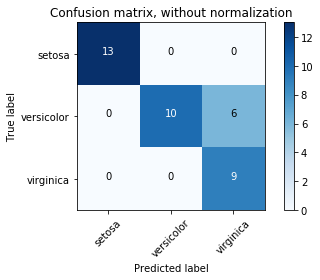

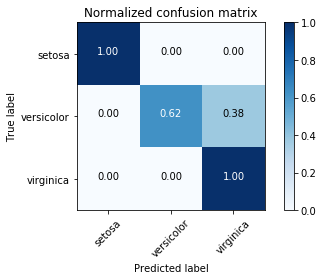

In [53]:
from sklearn.metrics import confusion_matrix
import plot_confusion_matrix

In [61]:
y_pred_LR_impv = y_predict_threshold(model_LR_impv, x_test, y_test, 0.2)

Normalized confusion matrix
[[0.85 0.15]
 [0.4  0.6 ]]


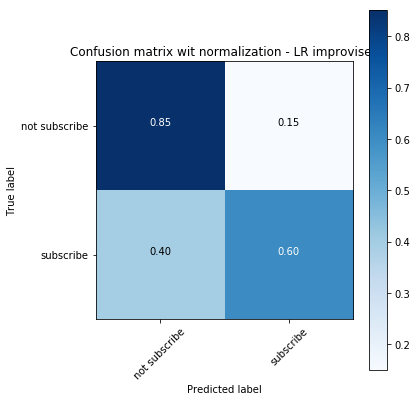

In [62]:
confusion_matrix_LR_impv = confusion_matrix(y_test, y_pred_LR_impv)
plt.figure(figsize=(6,6))
plot_confusion_matrix.plot_confusion_matrix(confusion_matrix_LR_impv, normalize=True, classes=['not subscribe','subscribe'],
                      title='Confusion matrix wit normalization - LR improvised')

AUC score of LR improvised is 0.7449.


C:\Users\rakesh\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)


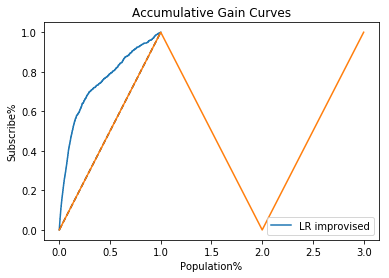

In [57]:
gain_plot(lift_LR_impv, label='LR improvised' )
plt.title('Accumulative Gain Curves')
plt.legend(loc='lower right')